# Exploration spark: "What's the most cliche song ever written? How do we even measure cliche-ness?"

In [18]:
import pandas as pd
import numpy as np

In [19]:
np.__version__

'1.19.5'

# Pull in data (prepped in other notebook)

In [20]:
df = pd.read_csv('./data/Songs with metadata and lyrics.csv')

In [21]:
df.head()

,SongID,Performer,Song,spotify_genre,spotify_track_preview_url,spotify_track_explicit,spotify_track_album,WeekID,Week Position,Peak Position,Lyrics
0,...Baby One More TimeBritney Spears,Britney Spears,...Baby One More Time,"['dance pop', 'pop', 'post-teen pop']",https://p.scdn.co/mp3-preview/da2134a161f1cb34...,False,...Baby One More Time (Digital Deluxe Version),5/29/1999,31.0,1.0,"[Intro]\nOh baby, baby\nOh baby, baby\n\n[Vers..."
1,...Ready For It?Taylor Swift,Taylor Swift,...Ready For It?,"['pop', 'post-teen pop']",NaN,False,"{'album_type': 'album', 'artists': [{'external...",12/2/2017,18.0,4.0,[Verse 1]\nKnew he was a killer first time tha...
2,'03 Bonnie & ClydeJay-Z Featuring Beyonce Knowles,Jay-Z Featuring Beyonce Knowles,'03 Bonnie & Clyde,"['east coast hip hop', 'hip hop', 'pop rap', '...",NaN,True,The Blueprint 2 The Gift & The Curse,12/28/2002,4.0,4.0,"[Intro: Jay Z]\nUhh, uhh, uhh\nYou ready, B?\n..."
3,'65 Love AffairPaul Davis,Paul Davis,'65 Love Affair,"['album rock', 'bubblegum pop', 'country rock'...",https://p.scdn.co/mp3-preview/a701445830ecacfb...,False,Radio Hits Of the '80s,6/12/1982,18.0,6.0,'65 love affair\nPaul Davis\n\nI was a car hop...
4,'TilThe Angels,The Angels,'Til,"['blues rock', 'garage rock', 'modern blues ro...",https://p.scdn.co/mp3-preview/bf264f14124ddf08...,False,Caprice! The Story Behind Gerry Granahan's Cap...,1/20/1962,38.0,14.0,"[Intro]\nYeah, yeah, yeah\nRap diablo\nYeah, y..."


In [22]:
df[df.Song == 'Our Song'].Lyrics.iloc[0]

'[Verse 1]\nI was riding shotgun with my hair undone\nIn the front seat of his car\nHe\'s got a one-hand feel on the steering wheel\nThe other on my heart\nI look around, turn the radio down\nHe says, "Baby, is something wrong?"\nI say, "Nothing, I was just thinking\nHow we don\'t have a song"\nAnd he says\n\n[Chorus]\nOur song is the slamming screen door\nSneakin\' out late, tapping on your window\nWhen we\'re on the phone and you talk real slow\n\'Cause it\'s late and your mama don\'t know\nOur song is the way you laugh\nThe first date: "Man, I didn\'t kiss her, and I should have"\nAnd when I got home \'fore I said amen\nAsking God if he could play it again\n\n[Verse 2]\nI was walking up the front porch steps\nAfter everything that day\nHad gone all wrong and been trampled on\nAnd lost and thrown away\nGot to the hallway, well on my way\nTo my lovin\' bed\nI almost didn\'t notice all the roses\nAnd the note that said\n\n[Chorus]\nOur song is the slamming screen door\nSneakin\' out la

# Simple definition: "cliche" is when write lines very similar to lines published in previous years.

## CLICHE->SONGS: choose a cliche (eg "I love you", "I've never felt this way before", "you're my everything"), then try to identify which songs contain it.

## SONGS->analyze->CLICHES: identify cliches from the songs

## Simplest: *word-for-word* identical

In [23]:
# using title as proxy for a single line here (lyrics too big to view)
df[df.Song.str.contains('i love you', case=False)] 

,SongID,Performer,Song,spotify_genre,spotify_track_preview_url,spotify_track_explicit,spotify_track_album,WeekID,Week Position,Peak Position,Lyrics
460,Baby I Love YouAretha Franklin,Aretha Franklin,Baby I Love You,"['classic soul', 'jazz blues', 'memphis soul',...",https://p.scdn.co/mp3-preview/39a582336820d9ae...,False,Aretha Arrives,9/16/1967,5.0,4.0,If you want my lovin'\nIf you really do\nDon't...
461,"Baby I Love Your Way (From ""Reality Bites"")Big...",Big Mountain,"Baby I Love Your Way (From ""Reality Bites"")",['reggae'],NaN,NaN,NaN,8/27/1994,34.0,6.0,PROLOGUE\n\nTwo tires fly. Two wail.\n\nA bamb...
479,"Baby, I Love YouAndy Kim",Andy Kim,"Baby, I Love You","['brill building pop', 'bubblegum pop']",NaN,False,Baby I Love You,9/6/1969,25.0,9.0,Have I ever told you\nHow good it feels to hol...
480,"Baby, I Love Your Way/Freebird MedleyWill To P...",Will To Power,"Baby, I Love Your Way/Freebird Medley",['freestyle'],NaN,NaN,NaN,2/18/1989,91.0,1.0,Shadows grow so long before my eyes\nAnd they'...
481,"Baby, I Love Your WayPeter Frampton",Peter Frampton,"Baby, I Love Your Way","['album rock', 'art rock', 'blues rock', 'brit...",NaN,False,Frampton Comes Alive! (Deluxe Edition),9/18/1976,30.0,12.0,[Verse 1]\nShadows grow so long before my eyes...
595,Because I Love You (The Postman Song)Stevie B,Stevie B,Because I Love You (The Postman Song),['freestyle'],https://p.scdn.co/mp3-preview/5894932928df6362...,False,Valentine's Day Love… A Special Kind,2/16/1991,49.0,1.0,I got your letter from the postman just the ot...
846,But You Know I Love YouThe First Edition,The First Edition,But You Know I Love You,[],https://p.scdn.co/mp3-preview/4aabe0d5899dbf62...,False,Country & Western Legend,3/8/1969,19.0,19.0,When the morning sun\nStreaks across my room\n...
2256,Hate That I Love YouRihanna Featuring Ne-Yo,Rihanna Featuring Ne-Yo,Hate That I Love You,"['barbadian pop', 'dance pop', 'pop', 'post-te...",NaN,False,Good Girl Gone Bad: Reloaded,1/12/2008,15.0,7.0,"[Intro: Rihanna & Ne-Yo]\nYeah, yeah\nYeah, ye..."
2279,He Don't Love You (Like I Love You)Tony Orland...,Tony Orlando & Dawn,He Don't Love You (Like I Love You),"['bubblegum pop', 'classic uk pop', 'country r...",https://p.scdn.co/mp3-preview/719f19b28e71a491...,False,He Don't Love You,6/14/1975,54.0,1.0,"He don't love you, like I love you\nIf he did,..."
2360,"Hello, I Love YouThe Doors",The Doors,"Hello, I Love You","['album rock', 'classic rock', 'piano rock', '...",https://p.scdn.co/mp3-preview/3d31a54a62e7489a...,False,Waiting for the Sun,8/3/1968,1.0,1.0,"[Chorus]\nHello, I love you\nWon't you tell me..."


## But how do you find similar lines that aren't *word-for-word* matches?

ie I want something like
> "Look at this cluster: "I love you", "you are my love", and "you are the love of my life" are close together. But "you are my spring dew" is far away."

### One approach: create a row for every *line*, then use word2vec & dimensio reduction to plot a 2D "phrase cloud"
- maybe limmit to first 10 lines of a song to quickly remove duplicates)
- maybe just start with most recent year

# DATA PREP: "explode" data into "one row per line"

# NOTE: I'm limiting data to 2019-2020

In [24]:
tiny_df = df[
    df.WeekID.str.endswith('2020') |
    df.WeekID.str.endswith('2019') |
    df.WeekID.str.endswith('2018') |
    df.WeekID.str.endswith('2017') |
    df.WeekID.str.endswith('2016')
]
# tiny_df = df

In [25]:
# tiny_df['Parsed Lyrics'] = tiny_df.Lyrics.apply(lambda l: l.split('\n')[:5])
tiny_df['Parsed Lyrics'] = tiny_df.Lyrics.apply(lambda l: l.split('\n'))

/Users/dmora/.virtualenvs/jupyter3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
tiny_df_parsed = tiny_df.explode('Parsed Lyrics').drop_duplicates(
    subset=['Parsed Lyrics', 'SongID']
).drop(
    columns=['Lyrics']
).rename(columns={'Parsed Lyrics': 'lyric_line'})


### Filter & clean

In [27]:
ENDS_WITH_YEAR_IN_PAREN = '\(\d{4}?\)$'  # eg "... (2018)"
BRACKETED = '^\[.*?\]$'  # eg "[...]"
SONG_DASH_ARTIST = '[A-Z].+\s\-\s[A-Z].+'  # EG "Ariana Grande and Victoria MonÃ©t - MONOPOLY"

with_filters = tiny_df_parsed[
    ~tiny_df_parsed['lyric_line'].str.contains(
        f'{BRACKETED}|{ENDS_WITH_YEAR_IN_PAREN}|{SONG_DASH_ARTIST}', 
        regex= True, case=False, na=False
    )
]

In [42]:
with_more_filters = with_filters[~with_filters.lyric_line.str.contains('" by ')]
with_more_filters['lyric_line'] = with_more_filters.lyric_line.str.replace('EmbedShare URLCopyEmbedCopy', '')

/Users/dmora/.virtualenvs/jupyter3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# NOTE: I'm dropping any row with *any* MISSING DATA 
Maybe we try something less aggressive later (eg blank genre is ok)

In [43]:
COLUMNS_FOR_VIZ = ['Performer', 'Song', 'spotify_genre', 'lyric_line', 'WeekID']

lyric_lines_ready_for_analysis = (
    with_more_filters[
        COLUMNS_FOR_VIZ
    ]
    .replace('', np.nan)
    .dropna()
    .reset_index(drop=True)
)

lyric_lines_ready_for_analysis['lyric_line'] = lyric_lines_ready_for_analysis['lyric_line'].apply(
    lambda val: val and val.replace('â\x80\x99', "'")
)
lyric_lines_ready_for_analysis

,Performer,Song,spotify_genre,lyric_line,WeekID
0,Taylor Swift,...Ready For It?,"['pop', 'post-teen pop']",Knew he was a killer first time that I saw him,12/2/2017
1,Taylor Swift,...Ready For It?,"['pop', 'post-teen pop']",Wondered how many girls he had loved and left ...,12/2/2017
2,Taylor Swift,...Ready For It?,"['pop', 'post-teen pop']","But if he's a ghost, then I can be a phantom",12/2/2017
3,Taylor Swift,...Ready For It?,"['pop', 'post-teen pop']","Holdin' him for ransom, some",12/2/2017
4,Taylor Swift,...Ready For It?,"['pop', 'post-teen pop']","Some boys are tryin' too hard, he don't try at...",12/2/2017
...,...,...,...,...,...
18868,Justin Bieber,Yummy,"['canadian pop', 'pop', 'post-teen pop']",I'm elated that you are my lady,3/28/2020
18869,Justin Bieber,Yummy,"['canadian pop', 'pop', 'post-teen pop']","You got the yum, yum, yum, yum",3/28/2020
18870,Justin Bieber,Yummy,"['canadian pop', 'pop', 'post-teen pop']","You got the yum, yum-yum, woah",3/28/2020
18871,Justin Bieber,Yummy,"['canadian pop', 'pop', 'post-teen pop']",Woah-ooh,3/28/2020


# EMBED WORDS USING Universal Encoder

In [44]:
#@title Load the Universal Sentence Encoder's TF Hub module
from absl import logging

import tensorflow as tf

import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

In [45]:
np.__version__

'1.19.5'

In [46]:
model = hub.load('./data/universal-sentence-encoder-large_5/')

In [47]:
def embed(input):
    return model(input)

In [48]:
message_embeddings = embed(lyric_lines_ready_for_analysis['lyric_line'])

# Dimension reduction

## Dimension reduction with TSNE

In [49]:
from sklearn.manifold import TSNE

In [50]:
# tsne_transformed_embeddings = TSNE(
#     n_components=2,
#     learning_rate='auto',
#     init='pca'
# ).fit_transform(message_embeddings)

In [51]:
def concat_x_and_y(x_and_y, df):
    return pd.concat(
    [df, pd.DataFrame(x_and_y, columns=['x', 'y'])],
    axis=1
)

In [52]:
# tsne_lyrics_and_artist = concat_x_and_y(
#     tsne_transformed_embeddings, 
#     lyric_lines_ready_for_analysis
# )

In [53]:
# sns.scatterplot(data=tsne_lyrics_and_artist, x='x', y='y')

# Dimension reduction with UMAP

In [54]:
import umap
from sklearn.preprocessing import StandardScaler

In [55]:
reducer = umap.UMAP()

In [56]:
embedding = reducer.fit_transform(
    StandardScaler().fit_transform(message_embeddings)
)

In [57]:
umap_x_and_y_added = concat_x_and_y(
    embedding, 
    df=lyric_lines_ready_for_analysis
)
umap_x_and_y_added

,Performer,Song,spotify_genre,lyric_line,WeekID,x,y
0,Taylor Swift,...Ready For It?,"['pop', 'post-teen pop']",Knew he was a killer first time that I saw him,12/2/2017,5.101047,0.057257
1,Taylor Swift,...Ready For It?,"['pop', 'post-teen pop']",Wondered how many girls he had loved and left ...,12/2/2017,6.262813,1.833838
2,Taylor Swift,...Ready For It?,"['pop', 'post-teen pop']","But if he's a ghost, then I can be a phantom",12/2/2017,7.136459,3.518742
3,Taylor Swift,...Ready For It?,"['pop', 'post-teen pop']","Holdin' him for ransom, some",12/2/2017,4.214580,1.067141
4,Taylor Swift,...Ready For It?,"['pop', 'post-teen pop']","Some boys are tryin' too hard, he don't try at...",12/2/2017,5.677608,-0.119711
...,...,...,...,...,...,...,...
18868,Justin Bieber,Yummy,"['canadian pop', 'pop', 'post-teen pop']",I'm elated that you are my lady,3/28/2020,4.531110,-3.061543
18869,Justin Bieber,Yummy,"['canadian pop', 'pop', 'post-teen pop']","You got the yum, yum, yum, yum",3/28/2020,7.876020,-0.526135
18870,Justin Bieber,Yummy,"['canadian pop', 'pop', 'post-teen pop']","You got the yum, yum-yum, woah",3/28/2020,7.774511,-0.518549
18871,Justin Bieber,Yummy,"['canadian pop', 'pop', 'post-teen pop']",Woah-ooh,3/28/2020,9.438740,0.386250


<AxesSubplot:xlabel='x', ylabel='y'>

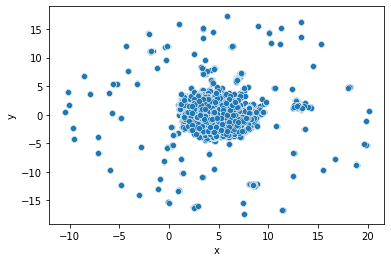

In [58]:
sns.scatterplot(data=umap_x_and_y_added, x='x', y='y')

## Export to CSV

In [59]:
def normalize_zero_to_one(s):
    return (s - s.min()) / (s.max() - s.min())

def export_normalized_data(data):
    temp = data.copy().dropna()
    temp['x'] = normalize_zero_to_one(temp.x)
    temp['y'] = normalize_zero_to_one(temp.y)
    temp['x'] = temp['x'].round(3)
    temp['y'] = temp['y'].round(3)
    export = temp
    export.to_csv('./data/viz ready export.csv', index=False)
    return export

In [61]:
the_export = export_normalized_data(umap_x_and_y_added)
the_export

,Performer,Song,spotify_genre,lyric_line,WeekID,x,y
0,Taylor Swift,...Ready For It?,"['pop', 'post-teen pop']",Knew he was a killer first time that I saw him,12/2/2017,0.510,0.504
1,Taylor Swift,...Ready For It?,"['pop', 'post-teen pop']",Wondered how many girls he had loved and left ...,12/2/2017,0.548,0.555
2,Taylor Swift,...Ready For It?,"['pop', 'post-teen pop']","But if he's a ghost, then I can be a phantom",12/2/2017,0.576,0.604
3,Taylor Swift,...Ready For It?,"['pop', 'post-teen pop']","Holdin' him for ransom, some",12/2/2017,0.481,0.533
4,Taylor Swift,...Ready For It?,"['pop', 'post-teen pop']","Some boys are tryin' too hard, he don't try at...",12/2/2017,0.528,0.499
...,...,...,...,...,...,...,...
18868,Justin Bieber,Yummy,"['canadian pop', 'pop', 'post-teen pop']",I'm elated that you are my lady,3/28/2020,0.491,0.414
18869,Justin Bieber,Yummy,"['canadian pop', 'pop', 'post-teen pop']","You got the yum, yum, yum, yum",3/28/2020,0.600,0.487
18870,Justin Bieber,Yummy,"['canadian pop', 'pop', 'post-teen pop']","You got the yum, yum-yum, woah",3/28/2020,0.597,0.487
18871,Justin Bieber,Yummy,"['canadian pop', 'pop', 'post-teen pop']",Woah-ooh,3/28/2020,0.651,0.513


# List of all: genres, artists

In [62]:
my_set = set()
the_export['Performer'].unique()

array(['Taylor Swift', 'Logic Featuring Alessia Cara & Khalid', 'J. Cole',
       'Kevin Gates', 'Bruno Mars',
       'David Guetta Featuring Justin Bieber',
       'Beyonce Featuring The Weeknd', 'Fetty Wap Featuring Remy Boyz',
       'Ariana Grande', 'Lukas Graham', 'Burl Ives', '21 Savage',
       'Coldplay', 'Mariah Carey', 'Kanye West', 'Kendrick Lamar & SZA',
       'Jon Bellion', 'The Chainsmokers Featuring Phoebe Ryan',
       'Travis Scott', 'The Carters', 'Charlie Puth', 'Chris Brown',
       'Selena Gomez', 'Migos Featuring Lil Uzi Vert', 'Halsey',
       'Billie Eilish', 'XXXTENTACION',
       'Post Malone Featuring Nicki Minaj', 'Nicki Minaj',
       'Cardi B Featuring 21 Savage', 'Cardi B', 'Imagine Dragons',
       'Post Malone', 'Khalid',
       'YG Featuring 2 Chainz, Big Sean & Nicki Minaj',
       'Rae Sremmurd Featuring Gucci Mane', 'Sam Hunt', 'Ella Mai',
       'Big Sean', 'BTS Featuring Halsey',
       'D.R.A.M. Featuring Lil Yachty', 'DNCE', 'The Weeknd', 'Lil 

In [63]:
from ast import literal_eval

my_set = set()
the_export['spotify_genre'].apply(
    lambda val: val and my_set.update(literal_eval(val))
)
my_set

{'adult standards',
 'alternative r&b',
 'american folk revival',
 'art pop',
 'atl hip hop',
 'atl trap',
 'australian dance',
 'australian electropop',
 'australian indie',
 'australian pop',
 'barbadian pop',
 'baroque pop',
 'baton rouge rap',
 'bedroom soul',
 'boy band',
 'british soul',
 'brostep',
 'cali rap',
 'canadian contemporary r&b',
 'canadian hip hop',
 'canadian pop',
 'chicago rap',
 'complextro',
 'conscious hip hop',
 'contemporary country',
 'country',
 'country pop',
 'country rap',
 'country road',
 'cowboy western',
 'dance pop',
 'danish pop',
 'deep talent show',
 'detroit hip hop',
 'dfw rap',
 'dirty south rap',
 'dmv rap',
 'downtempo',
 'edm',
 'electro house',
 'electronic trap',
 'electropop',
 'emo',
 'emo rap',
 'escape room',
 'etherpop',
 'florida rap',
 'g funk',
 'gangster rap',
 'german techno',
 'girl group',
 'hip hop',
 'hip pop',
 'house',
 'houston rap',
 'indie pop',
 'indie pop rap',
 'indie poptimism',
 'indie rock',
 'indietronica',
 'k-p

In [66]:
rap_genres = [genre for genre in list(my_set) if 'rap' in genre]

In [68]:
pop_genres = [genre for genre in list(my_set) if 'pop' in genre]
pop_genres

['uk pop',
 'pop',
 'scandipop',
 'dance pop',
 'swedish pop',
 'australian pop',
 'k-pop',
 'hip pop',
 'indie pop rap',
 'country pop',
 'k-pop boy group',
 'canadian pop',
 'etherpop',
 'post-teen pop',
 'swedish electropop',
 'nz pop',
 'baroque pop',
 'social media pop',
 'puerto rican pop',
 'stomp pop',
 'art pop',
 'pop rock',
 'danish pop',
 'barbadian pop',
 'electropop',
 'australian electropop',
 'pop rap',
 'indie poptimism',
 'latin pop',
 'metropopolis',
 'viral pop',
 'indie pop']